**OBJECTIVE**:

The goal of this project is to perform Exploratory Data Analysis (EDA) which aims to identify the most common medical conditions treated, Analyzing the most frequent side effects,Studying drug classifications and regulatory categories,
Examining drug ratings and review patterns,Understanding alcohol interaction patterns and generating meaningful healthcare insights.

 **DATASET DESCRIPTION**

The dataset contains information about various drugs, their side effects,
medical conditions treated, ratings, and regulatory classifications.
The dataset contains total 2931 rows and total 17 columns.
Drug name, medical condition, side effects, generic name, drug classes,activity, rx otc, pregnancy category, csa, alcohol, rating,
no of reviews this are important columns present in dataset.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("/content/drugs_side_effects_drugs_com.csv")
df.head()


,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

,rating,no_of_reviews
count,1586.000000,1586.000000
mean,6.812926,75.064943
std,2.313044,184.900847
min,0.000000,1.000000
25%,5.600000,2.000000
50%,7.000000,12.000000
75%,8.500000,58.000000
max,10.000000,2934.000000


In [ ]:
columns_to_drop = [
    'brand_names',
    'medical_condition_description',
    'related_drugs',
    'drug_link',
    'medical_condition_url'
]

df.drop(columns=columns_to_drop, inplace=True)

print("New Shape After Dropping Columns:", df.shape)

New Shape After Dropping Columns: (2931, 12)


In [ ]:
df.isnull().sum()

,0
drug_name,0
medical_condition,0
side_effects,124
generic_name,43
drug_classes,82
activity,0
rx_otc,1
pregnancy_category,229
csa,0
alcohol,1554


In [ ]:
df['rating'] = df['rating'].fillna(df['rating'].median())
df['no_of_reviews'] = df['no_of_reviews'].fillna('Not Available')

df['generic_name'] = df['generic_name'].fillna('Not Available')
df['drug_classes'] = df['drug_classes'].fillna('Unclassified')
df['pregnancy_category'] = df['pregnancy_category'].fillna('Not Classified')
df['side_effects'] = df['side_effects'].fillna('Not Specified')
df['rx_otc'] = df['rx_otc'].fillna('Not Specified')
df['alcohol_interaction'] = df['alcohol'].apply(lambda x: 1 if x == 'X' else 0)
df.drop(columns=['alcohol'], inplace=True)

df.isnull().sum()



,0
drug_name,0
medical_condition,0
side_effects,0
generic_name,0
drug_classes,0
activity,0
rx_otc,0
pregnancy_category,0
csa,0
rating,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['no_of_reviews'] = pd.to_numeric(df['no_of_reviews'], errors='coerce')

min_reviews = 100
filtered_df = df[df['no_of_reviews'] >= min_reviews]

top_drugs = (
    filtered_df.groupby('drug_name')
    .agg({'rating':'mean', 'no_of_reviews':'sum'})
    .sort_values('rating', ascending=False)
    .head(10)
)

top_drugs

,rating,no_of_reviews
drug_name,,
tramadol,9.3,106.0
efavirenz / emtricitabine / tenofovir,9.1,107.0
Atripla,9.1,103.0
Adipex-P,8.9,600.0
Valium,8.8,194.0
OxyContin,8.8,194.0
Percocet,8.7,186.0
phentermine,8.7,2934.0
Maxalt,8.7,120.0


In [ ]:
min_reviews = 100

filtered_df = df[df['no_of_reviews'] >= min_reviews]

least_drugs = (
    filtered_df.groupby('drug_name')
    .agg({
        'rating':'mean',
        'no_of_reviews':'sum'
    })
    .sort_values('rating', ascending=True)
    .head(10)
    .reset_index()
)

least_drugs

,drug_name,rating,no_of_reviews
0,alendronate,2.5,106.0
1,denosumab,2.7,337.0
2,Prolia,2.7,332.0
3,NP Thyroid,3.0,129.0
4,trimethoprim,3.0,134.0
5,Belsomra,3.6,505.0
6,ezetimibe,3.6,125.0
7,suvorexant,3.7,530.0
8,ethinyl estradiol / norethindrone,3.8,187.0
9,ramelteon,4.0,144.0


In [ ]:
condition_summary = (
    df.groupby('medical_condition')
    .agg({
        'drug_name': 'count',
        'no_of_reviews': 'sum',
        'rating': 'mean'
    })
    .reset_index()
)

condition_summary.columns = [
    'medical_condition',
    'drug_count',
    'total_reviews',
    'avg_rating'
]

top_competitive_conditions = (
    condition_summary
    .sort_values('drug_count', ascending=False)
    .head(10)
)

top_competitive_conditions

,medical_condition,drug_count,total_reviews,avg_rating
37,Pain,264,6533.0,7.042803
13,Colds & Flu,245,193.0,6.917551
2,Acne,238,11863.0,7.285294
28,Hypertension,177,4360.0,6.276271
35,Osteoarthritis,129,3418.0,6.804651
26,Hayfever,124,1855.0,6.947581
20,Eczema,122,684.0,7.374590
1,AIDS/HIV,109,1656.0,7.028440
18,Diabetes (Type 2),104,8001.0,5.952885
39,Psoriasis,93,918.0,7.125806


In [ ]:
condition_summary = (
    df.groupby('medical_condition')
    .agg({
        'drug_name': 'count',
        'no_of_reviews': 'sum',
        'rating': 'mean'
    })
    .reset_index()
)

condition_summary.columns = [
    'medical_condition',
    'drug_count',
    'total_reviews',
    'avg_rating'
]

least_competitive_conditions = (
    condition_summary
    .sort_values('drug_count', ascending=True)
    .head(10)
)

least_competitive_conditions

,medical_condition,drug_count,total_reviews,avg_rating
43,Stroke,5,28.0,7.520000
44,Swine Flu,5,38.0,8.320000
23,Gastrointestinal,7,0.0,7.000000
33,Menopause,7,33.0,6.914286
24,Gout,9,216.0,8.355556
27,Herpes,10,988.0,7.690000
25,Hair Loss,11,204.0,6.063636
21,Erectile Dysfunction,13,2323.0,7.530769
3,Allergies,14,466.0,6.242857
29,Hypothyroidism,17,1130.0,5.611765


In [ ]:
df['pregnancy_category'].value_counts()

,count
pregnancy_category,
C,1382
B,509
N,436
Not Classified,229
D,228
X,129
A,18


In [ ]:
safe_drugs = df[df['pregnancy_category'].isin(['A', 'B'])]

safe_drugs = safe_drugs[safe_drugs['no_of_reviews'] >= 20]
top_safe_drugs = safe_drugs.sort_values(
    by='rating',
    ascending=False
)[['drug_name', 'pregnancy_category', 'rating', 'no_of_reviews']].head(10)

top_safe_drugs

,drug_name,pregnancy_category,rating,no_of_reviews
307,cobicistat / elvitegravir / emtricitabine / te...,B,9.5,89.0
297,Stribild,B,9.5,89.0
1548,Aciphex,B,9.3,36.0
1526,Staxyn,B,8.7,24.0
2915,diethylpropion,B,8.7,154.0
1521,Cialis,B,8.6,448.0
1523,Viagra,B,8.5,227.0
1524,tadalafil,B,8.4,601.0
311,Complera,B,8.3,58.0
358,emtricitabine / rilpivirine / tenofovir,B,8.3,58.0


In [ ]:
risk_drugs = df[df['pregnancy_category'].isin(['D', 'X'])]
risk_drugs = risk_drugs[risk_drugs['no_of_reviews'] >= 20]
top_risk_high_rating = risk_drugs.sort_values(
    by='rating',
    ascending=False
)[['drug_name', 'pregnancy_category', 'rating', 'no_of_reviews']].head(10)

top_risk_high_rating

,drug_name,pregnancy_category,rating,no_of_reviews
2115,caffeine / ergotamine,X,9.1,23.0
324,efavirenz / emtricitabine / tenofovir,D,9.1,107.0
298,Atripla,D,9.1,103.0
2909,Adipex-P,X,8.9,600.0
524,Valium,D,8.8,194.0
2908,phentermine,X,8.7,2934.0
2018,estazolam,X,8.6,24.0
516,alprazolam,D,8.6,840.0
514,Xanax,D,8.5,552.0
8,Bactrim,D,8.5,96.0


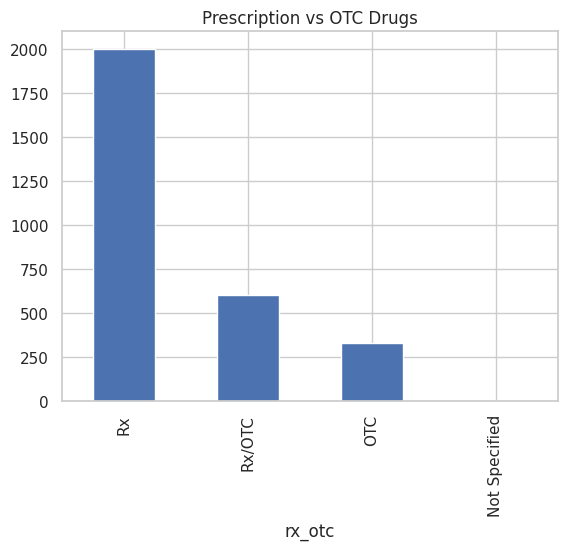

In [ ]:
df["rx_otc"].value_counts().plot(kind="bar")
plt.title("Prescription vs OTC Drugs")
plt.show()

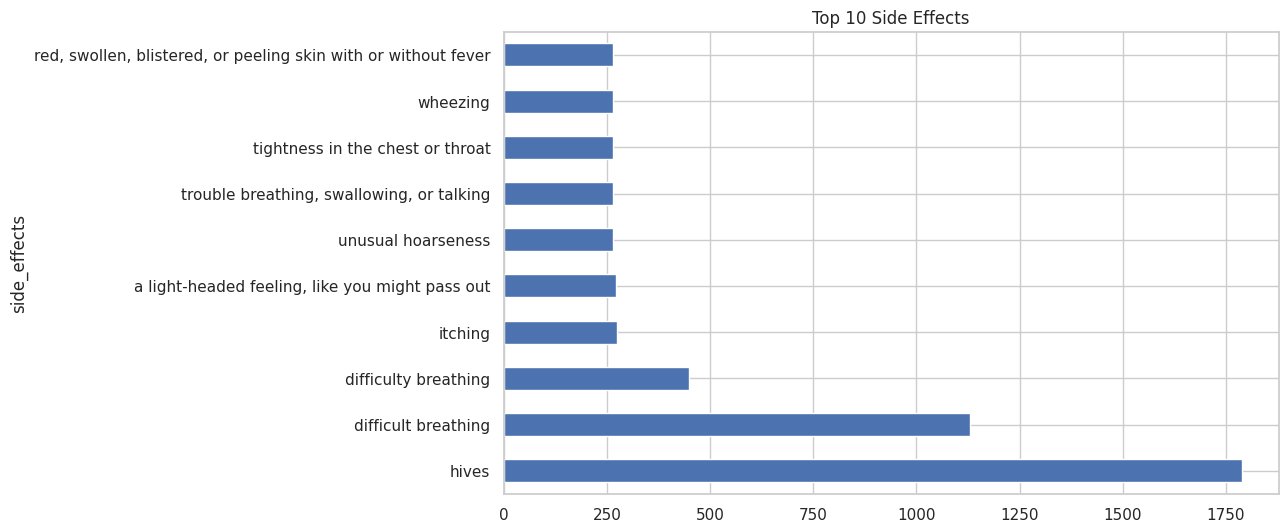

,count
side_effects,
hives,1788
difficult breathing,1130
difficulty breathing,450
itching,275
"a light-headed feeling, like you might pass out",272
unusual hoarseness,266
"trouble breathing, swallowing, or talking",266
tightness in the chest or throat,266
wheezing,266


In [ ]:
def extract_side_effects(text):
    return [effect.strip() for effect in re.split(r"[;]", text)]

side_effects = df["side_effects"].apply(extract_side_effects).explode()

top_side_effects = side_effects.value_counts().head(10)

plt.figure(figsize=(10,6))
top_side_effects.plot(kind="barh")
plt.title("Top 10 Side Effects")
plt.show()

top_side_effects

In [ ]:
def extract_classes(text):
    return [cls.strip() for cls in re.split(r"[,]", text)]

drug_classes = df["drug_classes"].apply(extract_classes).explode()

top_classes = drug_classes.value_counts().head(10)
print,top_classes.head(10)

(<function print(*args, sep=' ', end='\n', file=None, flush=False)>,
 drug_classes
 Upper respiratory combinations          245
 Topical acne agents                     125
 Topical steroids                         94
 Antihistamines                           82
 Unclassified                             82
 Nonsteroidal anti-inflammatory drugs     72
 Laxatives                                59
 Miscellaneous topical agents             56
 Topical rubefacient                      56
 Topical anesthetics                      54
 Name: count, dtype: int64)

In [ ]:
reviews_by_alcohol = df.groupby('alcohol_interaction')['no_of_reviews'].mean()

reviews_by_alcohol

,no_of_reviews
alcohol_interaction,
0,51.174479
1,97.495110


In [ ]:
df.to_csv("cleaned_drug_data.csv", index=False)

**KEY INSIGHTS**

- Top 10 highest-rated and most-reviewed drugs were identified, along with the 10 lowest-rated drugs, showing user preferences and satisfaction levels.  
- Analysis of medical conditions highlighted the top 10 conditions with the most drugs and the 10 conditions with the fewest, indicating well- and under-served areas.  
- Pregnancy category distribution was studied; the top 10 safest and 10 riskiest drugs for pregnancy were identified based on ratings and reviews.  
- Prescription (Rx) drugs are more numerous than over-the-counter (OTC) drugs, reflecting greater reliance on prescribed medications.  
- The top 10 reported side effects were identified, providing insight into common adverse reactions.  
- Among drug classes, the top 10 with the highest drug counts were highlighted, showing the most represented therapeutic areas.  
- Alcohol interaction analysis based on reviews revealed drugs with significant interaction concerns.

**CONCLUSION**

The analysis provides a clear overview of the dataset, highlighting key trends in drug ratings, medical conditions, pregnancy safety, drug types, side effects, and therapeutic classes. Prescription drugs dominate over OTC options, and certain conditions have more treatment options than others. Insights on pregnancy safety and alcohol interactions can guide safer usage, while identifying top side effects and drug classes helps in understanding common treatment patterns. Overall, the findings offer actionable information for healthcare professionals, researchers, and patients to make informed decisions.